In [14]:
from coord import *
import matplotlib.pyplot as plt
import numpy as np
from genreflex import get_v, plot_reflex_model
import matplotlib as mpl
import matplotlib.cm as cm


In [21]:
# Results from table 1 in YPP+2024
lrr = np.array([119.8, 139.1, 63.5, 37.8])
brr = np.array([19.5, -59.4, -46.4, -37.3])
vtrr= np.array([15.7, 16.6, 23.2, 40.4])
vrrr= np.array([7.9, -10.1, -27, -8.5])
vphirr=np.array([-11.5,-13.5,-20.,-23.])
vthrr =np.array([-8., 8., 19,17.3])

# uncomment for pure reflex motion
vrrr = np.zeros_like(lrr)
vphirr = np.zeros_like(lrr)
vthrr = np.zeros_like(lrr)

## Plotting the line-of-sight velocity maps with only reflex motion (no bulk motions included)

using axes defined outside function
using vlosnorm
using axes defined outside function
using vlosnorm
using axes defined outside function
using vlosnorm
using axes defined outside function
using vlosnorm


/home/ryaa/reflexcalc/genreflex.py:151: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(-l, b, c=cm.coolwarm((vlos -np.min(vlosnorm))/(np.max(vlosnorm) - np.min(vlosnorm))), cmap="seismic")
/tmp/ipykernel_107275/22151532.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Text(0.5, 1.0, 'Reflex model in line of sight velocity')

<Figure size 640x480 with 0 Axes>

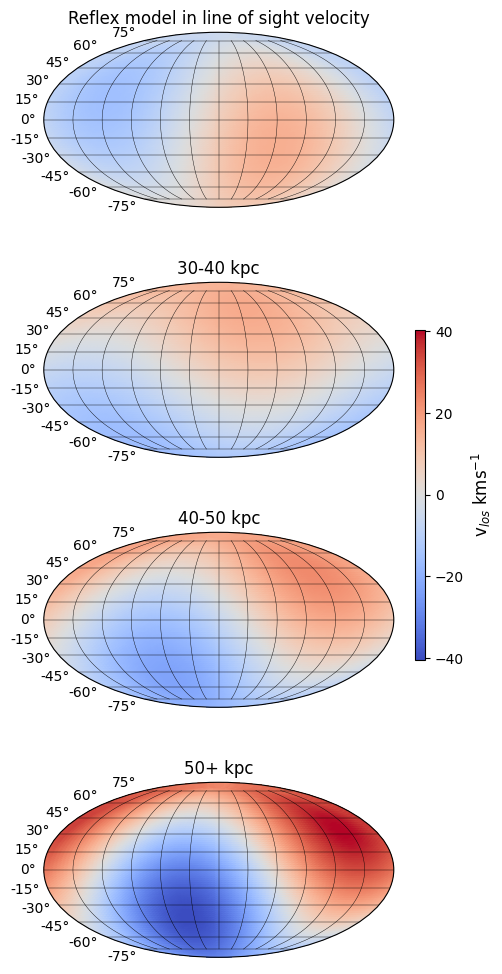

In [78]:
distance_titles = ["20-30 kpc", "30-40 kpc", "40-50 kpc", "50+ kpc"]
kcolor = 'lightslategrey'

pointres = 100
rgal = np.zeros((int(pointres**2.), 3))
vgal = np.zeros((int(pointres**2.), 3))
phirange = np.linspace(0,2.*np.pi,pointres)
thrange = np.linspace(-np.pi/2.,np.pi/2.,pointres)
pp,tt = np.meshgrid(phirange,thrange)

ppflat = pp.reshape(-1,)
ttflat = tt.reshape(-1,)

rgal[:,0] = np.cos(ttflat)*np.cos(ppflat)
rgal[:,1]  = np.cos(ttflat)*np.sin(ppflat)
rgal[:,2]  = np.sin(ttflat)

vgal[:,0] = np.zeros(int(pointres**2.))
vgal[:,1] = np.zeros(int(pointres**2.))
vgal[:,2] = np.zeros(int(pointres**2.))

vtrrflip=np.flip(vtrr)
plt.clf()

fig = plt.figure(figsize=(7, 10))

ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.33
ax7 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax = [ax7]

ax = [ax4, ax3, ax2, ax1]
    
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    vlosnormcube = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, vlosnorm, _, _ = get_v(vlosnormcube,rgal*300., vgal*240./1.4, solar=False)
    plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="vlos", vlosnorm=vlosnorm)
    ax[i].grid(True, c="k", lw=0.3)	
    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )
    
    #adding custom colorbar
    norm = mpl.colors.Normalize(vmin=-vtrrflip[0], vmax=vtrrflip[0])
    cb = mpl.colorbar.ColorbarBase(cbarax[0], cmap = cm.coolwarm, norm = norm)
    cb.set_label('v$_{los}$ kms$^{-1}$',size=12)
    cb.set_ticks(ticks=np.array([-vtrrflip[0], np.round(-vtrrflip[0]/2.,0), 0, np.round(vtrrflip[0]/2.,0), vtrrflip[0]]).astype(int))
plt.tight_layout()
ax[0].set_title("Reflex model in line of sight velocity")

## Plotting the proper motion map


using axes defined outside function
using axes defined outside function
using axes defined outside function
using axes defined outside function


/home/ryaa/reflexcalc/genreflex.py:155: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(-l, b, c=cm.coolwarm((mul -np.min(mul))/(np.max(vlos) - np.min(vlos))), cmap="seismic")
/tmp/ipykernel_107275/333143387.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


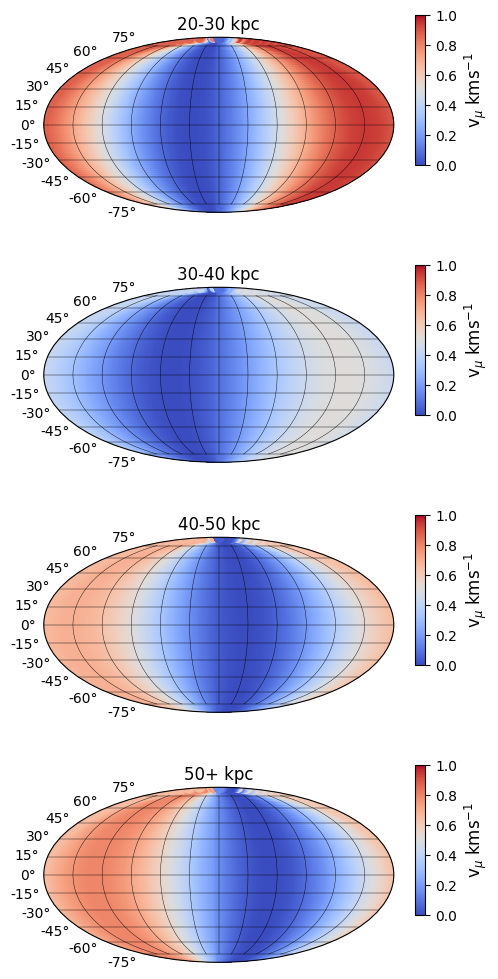

In [85]:
fig = plt.figure(figsize=(7, 10))

ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.15
cbarax1 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax2 = fig.add_axes([0.73 ,0.58,0.015,cbarh])
cbarax3 = fig.add_axes([0.73 ,0.83,0.015,cbarh])
cbarax4 = fig.add_axes([0.73 ,0.08,0.015,cbarh])
cbarax = [cbarax1, cbarax2, cbarax3, cbarax4]
ax = [ax4, ax3, ax2, ax1]
    
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    mulnorm = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, _, mul, _ = get_v(mulnorm,rgal*300., vgal*240./1.4, solar=False)
    plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="mul")
    ax[i].grid(True, c="k", lw=0.3)	

    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )

    #for each ax add a colorbar
    cbar = mpl.colorbar.ColorbarBase(cbarax[i], cmap = cm.coolwarm)
    cbar.set_label('v$_{\mu}$ kms$^{-1}$',size=12)

    
plt.tight_layout()

## Plotting the proper motion in b map

using axes defined outside function
using axes defined outside function
using axes defined outside function
using axes defined outside function


/home/ryaa/reflexcalc/genreflex.py:157: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(-l, b, c=cm.coolwarm((mub -np.min(vlos))/(np.max(vlos) - np.min(vlos))), cmap="seismic")
/tmp/ipykernel_107275/423851396.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


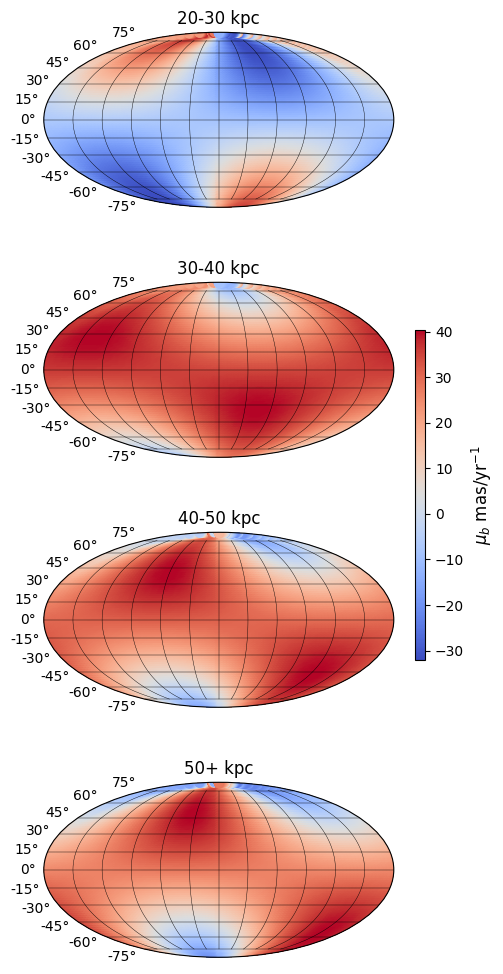

In [46]:
fig = plt.figure(figsize=(7, 10))

ax1 = fig.add_axes([0.2 ,0.0,0.5,0.24], projection = 'mollweide')
ax2 = fig.add_axes([0.2,0.25,0.5,0.24], projection = 'mollweide')
ax3 = fig.add_axes([0.2 ,0.50,0.5,0.24],projection = 'mollweide')
ax4 = fig.add_axes([0.2,0.75,0.5,0.24], projection = 'mollweide')

cbarh = 0.33
ax7 = fig.add_axes([0.73 ,0.33,0.015,cbarh])
cbarax = [ax7]

ax = [ax4, ax3, ax2, ax1]
    
for i in range(len(lrr)):
    cube = [np.deg2rad(lrr[i]), np.deg2rad(90)- np.deg2rad(brr[i]), vtrr[i], vrrr[i], vphirr[i], vthrr[i]]
    mulnorm = [np.deg2rad(lrr[-1]), np.deg2rad(90)- np.deg2rad(brr[-1]), vtrr[-1], vrrr[-1], vphirr[-1], vthrr[-1]]
    _,_,_, _, _, mub = get_v(mulnorm,rgal*300., vgal*240./1.4, solar=False)
    plot_reflex_model(cube, rgal, vgal, ax = ax[i], quant="mub")
    ax[i].grid(True, c="k", lw=0.3)	

    ax[i].set_title(distance_titles[i])
    ax[i].tick_params(axis="x", which="both", labelbottom=False, direction="in",size=8)
    ax[i].tick_params(axis="y", which="both", labelbottom=False, direction="in", size=8 )
    
    #adding custom colorbar
    norm = mpl.colors.Normalize(vmin=min(mub), vmax=max(mub))
    cb = mpl.colorbar.ColorbarBase(cbarax[0], cmap = cm.coolwarm, norm = norm)
    cb.set_label('$\mu_{b}$ mas/yr$^{-1}$',size=12)
plt.tight_layout()

## Calculating the corrections to observables from your own data

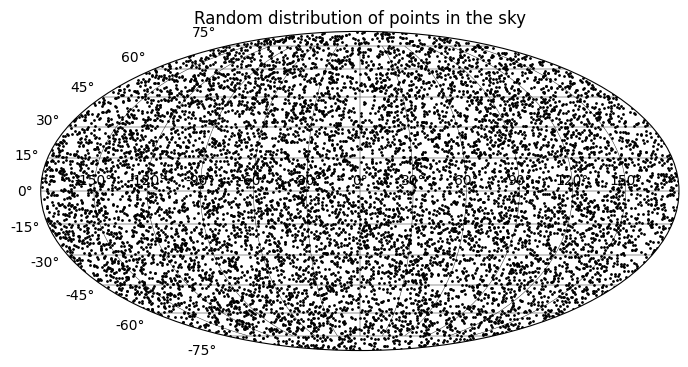

In [59]:
pointres = 100
#Generate random points in the sky in galactic coordinates cartesian
rgal = np.random.randn(int(pointres**2.), 3)   
vgal = np.random.randn(int(pointres**2.), 3)   

#scale to from unit sphere to 300 kpc
rgal = rgal/np.linalg.norm(rgal, axis=1)[:,None]*300.
vgal = vgal/np.linalg.norm(vgal, axis=1)[:,None]*240./1.4

#make the generated points patchy in the sky
r = np.linalg.norm(rgal, axis=1)
l = np.arctan2(rgal[:,1],rgal[:,0])
b = np.arccos(rgal[:,2]/r)
b = np.pi/2. - b
#plot the distribution of the generated points
fig, ax = plt.subplots(1, 1, figsize=(7, 10), subplot_kw={'projection': 'mollweide'})
ax.scatter(l, b, c='k', s=1)
ax.grid(True, c="k", lw=0.3)
ax.set_title("Random distribution of points in the sky")
plt.tight_layout()


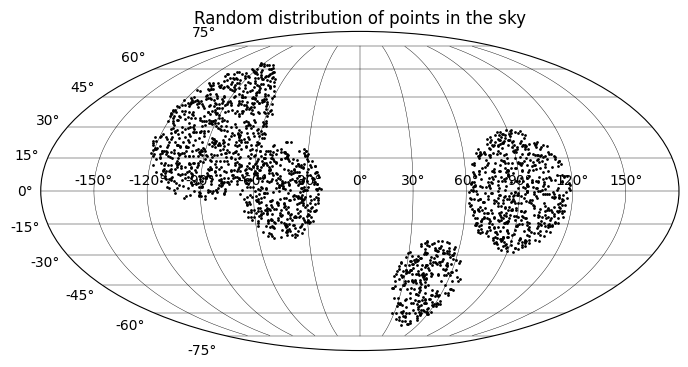

In [75]:
#now make the data a bit patchy
circle_centres = np.array([[-np.pi/2,np.pi/6],[np.pi/4.,-np.pi/4],[-np.pi/4,0],[np.pi/2.,0]])
circle_radii = np.array([0.6,0.4,0.4,0.5])
0
mask = []

for i in range(len(rgal)):
    for j in range(len(circle_centres)):
        if np.sqrt((l[i]-circle_centres[j][0])**2 + (b[i]-circle_centres[j][1])**2) < circle_radii[j]:
            mask.append(i)
            break
#plot the distribution of the generated points
fig, ax = plt.subplots(1, 1, figsize=(7, 10), subplot_kw={'projection': 'mollweide'})
ax.scatter(l[mask], b[mask], c='k', s=1)
ax.grid(True, c="k", lw=0.3)
ax.set_title("Random distribution of points in the sky")
plt.tight_layout()
plt.show()



In [76]:
#mask r and v
rgalm = rgal[mask]
vgalm = vgal[mask]

#calculate the reflex motion for this data in each bin

